## Numpy and Pandas for Machine Learning  

## NOT USING scikit-learn for the and writing Python code from scratch.  

## Background: classification using $\ell2$ regularised logistic regression and gradient descent

Regularisation is a technique commonly used in Machine Learning to prevent overfitting. It consists on adding terms to the objective function such that the optimisation procedure avoids solutions that just learn the training data. Popular techniques for regularisation in Supervised Learning include [Lasso Regression](https://en.wikipedia.org/wiki/Lasso_(statistics)), [Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) (often called $\ell2$ regression) and the [Elastic Net](https://en.wikipedia.org/wiki/Elastic_net_regularization). 

Here we will build a logistic regression model with $\ell2$ regularisation, and implement equations to optimise the objective function using the update rules for gradient descent. 

### Binary classification

Bernoulli distribution is a discrete probability distribution that models a single binary outcome $y \in \{0, 1\}$, expressed as 
$$ p(Y=y) = \text{Ber}(y|\mu) = \begin{cases}
        \mu & \text{if} \ y = 1\\
        (1-\mu) & \text{if} \ y = 0
\end{cases} $$
where $\mu$ is the probability of $y=1$. The expression can be summarised in one line using
$$ p(Y=y) = \text{Ber}(y|\mu) = \mu^y (1-\mu)^{1-y}.$$

### Logistic Regression with $\ell2$ regularisation

Let us start with a data set for training $\mathcal{D} = \{\mathbf{y}, \mathbf{X}\}$, where the vector $\mathbf{y}=[y_1, \cdots, y_N]^{\top}$ and $\mathbf{X}$ is the design matrix from Lab 3, this is, 

\begin{align*}
    \mathbf{X} = 
                \begin{bmatrix}
                        1 & x_{1,1} & \cdots & x_{1, D}\\
                        1 & x_{2,1} & \cdots & x_{2, D}\\
                   \vdots &  \vdots\\
                        1 & x_{N,1} & \cdots & x_{N, D}
                \end{bmatrix}
               = 
               \begin{bmatrix}
                      \mathbf{x}_1^{\top}\\
                       \mathbf{x}_2^{\top}\\
                          \vdots\\
                        \mathbf{x}_N^{\top}
                \end{bmatrix}.
\end{align*}

Our predictive model is going to be the non-linear logistic regression model, where the probability $\mu(\mathbf{x})$ that a sample belongs to class $y=1$ is given as

$$ \mu(\mathbf{x}) = \frac{1}{1 + \exp{(-\mathbf{w}^{\top}\mathbf{x})}} = \sigma(\mathbf{w}^{\top}\mathbf{x}),$$

where $\sigma(\cdot)$ is known as the *logistic sigmoid* function. If we assume the target feature follows a Bernoulli distribution, we then have

$$ p(\mathbf{y} | \mathbf{X}, \mathbf{w}) = \prod_{n=1}^N \sigma(\mathbf{w}^{\top} \mathbf{x}_n)^{y_n} (1 - \sigma(\mathbf{w}^{\top} \mathbf{x}_n))^{1-y_n}. $$

The cross-entropy loss function is given as
$$ \mathcal{L}(\mathbf{w}) = - \log p(\mathbf{y} | \mathbf{X}, \mathbf{w}) = - \sum_{n=1}^N \left\{ y_n \log \left[\sigma(\mathbf{w}^{\top} \mathbf{x}_n)\right] + (1-y_n) \log \left[(1 - \sigma(\mathbf{w}^{\top} \mathbf{x}_n))\right] \right\} $$

which can be minimised with respect to $\mathbf{w}$. To prevent overfitting, we will add a regularisation term to the loss function. This extra term added to the loss function penalises large values of the weights $\mathbf{w}$. If we're using $\ell_2$ norm regularisation, then the regularisation term $R(\mathbf{w})$ is 
$$ R(\mathbf{w}) = \frac{1}{2} \sum_{j=1}^D w_j^2 = \frac{1}{2} \mathbf{w}^{\top} \mathbf{w}.$$

and the regularised loss function is then
$$ E(\mathbf{w}, \lambda) = - \sum_{n=1}^N \left\{ y_n \log \left[\sigma(\mathbf{w}^{\top} \mathbf{x}_n)\right] + (1-y_n) \log \left[(1 - \sigma(\mathbf{w}^{\top} \mathbf{x}_n))\right] \right\} + \frac{\lambda}{2}\sum^{D}_{j=0}w_j^2. $$
where $\lambda>0$ is known as the *regularisation* parameter, and $N$ is the number of samples. This function can again be minimised with respect to $\mathbf{w}$. One way to do this is using gradient descent.

### Optimising the objective function with respect to $\mathbf{w}$
We can find the optimal model weights using an iterative optimisation procedure that updates the value of $\mathbf{w}$ at each iteration by using the gradient of the objective function with respect to $\mathbf{w}$,
$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \frac{d E(\mathbf{w}, \lambda)}{d\mathbf{w}},
$$
where $\eta$ is the *learning rate* parameter and $\frac{d E(\mathbf{w}, \lambda)}{d\mathbf{w}}$ is the gradient of the objective function.

To do this, we need to know the gradient of the loss function with respect to $\mathbf{w}$. To calculate this for the logistic function, we need to use the chain rule:
\begin{align*}
        \frac{d\sigma(z)}{dz} & = \frac{-1}{1+\exp(-z)^2} \exp(-z) (-1) \\
                & = \frac{1}{1+\exp(-z)} \frac{\exp(-z)}{1+\exp(-z)} \\
\end{align*}
and since $ 1 - \frac{1}{1+\exp(-z)} = \frac{\exp(-z)}{1+\exp(-z)}$, this can be rewritten as
$$ \frac{d\sigma(z)}{dz} =\frac{1}{1+\exp(-z)} \left(1 - \frac{1}{1+\exp(-z)}\right) = \sigma(z) (1 - \sigma(z)).$$  
The gradient of the regularisation term with respect to $\mathbf{w}$ is straightforward. Now that we have this, we again use the chain rule in the update equation for $\mathbf{w}_{\text{new}}$ using gradient descent leading to:
\begin{align*}
   \frac{dE(\mathbf{w}, \lambda)}{d\mathbf{w}} & = -\frac{\partial}{\partial\mathbf{w}} \sum_{n=1}^N \left\{ y_n \log \left[\sigma(\mathbf{w}^{\top} \mathbf{x}_n)\right] + (1-y_n) \log \left[(1 - \sigma(\mathbf{w}^{\top} \mathbf{x}_n))\right] \right\} + \frac{\partial}{\partial\mathbf{w}}\frac{\lambda}{2}\sum^{D}_{j=0}w_j^2 \\
        & = -\sum_{n=1}^N \left\{  \frac{y_n}{\sigma(\mathbf{w}^{\top} \mathbf{x}_n)} \sigma(\mathbf{w}^{\top} \mathbf{x}_n) (1 - \sigma(\mathbf{w}^{\top} \mathbf{x}_n)) \mathbf{x}_n + \frac{1-y_n}{1 - \sigma(\mathbf{w}^{\top} \mathbf{x}_n)} (-\sigma(\mathbf{w}^{\top} \mathbf{x}_n)) (1 - \sigma(\mathbf{w}^{\top} \mathbf{x}_n)) \mathbf{x}_n \right\} + \lambda \mathbf{w} \\
        & =  \sum^N_{n=1} (\sigma(\mathbf{x}_n^\top\mathbf{w}) - y_n)\mathbf{x}_n + \lambda \mathbf{w} 
\end{align*}

The entire update equation can be *vectorised*, that is, operations performed on whole matrices without need for a summation.

## Pre-set up: imports and random seed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(57797) 

## Dataset: Wine Origin

The dataset used comes from a popular machine learning repository that hosts open source datasets for educational and research purposes, the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). **We are going to use logistic regression to classify wines by origin**. The description of the dataset can be found [on the UCI website](https://archive.ics.uci.edu/dataset/109/wine). A copy of the dataset is provided in the file `./wine-classification-missing.csv`.

We can view some of the rows in the dataset with the `.sample()` method, or print the first few rows with the `.head()` method.

In [3]:
# Read the data into a pandas dataframe
# wine_data = pd.read_csv('./winequality-red-missing.csv', sep=';', index_col=0)
wine_data = pd.read_csv('./wine-classification-missing.csv', sep=';', index_col=0)

# View 10 random rows of the data
wine_data.sample(10)

,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
31,0,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
29,0,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035
142,0,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520
19,0,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
131,0,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,NaN,1.42,530
164,0,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615
107,1,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
120,1,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,NaN,625
176,0,13.17,NaN,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,NaN,840
57,0,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,NaN,1270


The target variable is the class identifier (0 or 1) of the wine, representing the region it came from. The other 13 columns are variables, such as the acidity, the alcohol content, etc. which together make up the *feature vector* of each wine. We will use these feature vectors to classify the origin of the wine.

## Splitting the dataset (1 mark)

Before designing any machine learning model, we need to set aside the test data. We will use the remaining training data for fitting the model. *It is important to remember that the test data has to be set aside before preprocessing*. 

Any preprocessing has to be calibrated *only* on the training data, and several key statistics from this preprocessing need to be saved for the test stage. Separating the dataset into training and test before any preprocessing has happened helps us to recreate the real world scenario where we will deploy our system and for which the data will come without any preprocessing.

Furthermore, we are going to use *hold-out validation* for validating our predictive model, so we need to further separate the training data into a training set and a validation set.

In this step, we should first **shuffle the data**, then split the dataset into a training set, a validation set and a test set: 
- The training set should have 70% of the total observations,
- The validation set should have 15% of the total observations,
- The test set should have the remaining 15%. 



In [4]:
# Your code here
shuffled_indices = np.arange(len(wine_data))
rng.shuffle(shuffled_indices)
shuffled_data = wine_data.iloc[shuffled_indices]

# Calculate the sizes for training, validation, and test sets
total_samples = len(shuffled_data)
train_size = int(0.7 * total_samples)
val_test_size = int(0.15 * total_samples)

# Split the data into training, validation, and test sets
train_set = shuffled_data[:train_size]
val_set = shuffled_data[train_size:train_size + val_test_size]
test_set = shuffled_data[train_size + val_test_size:]

# Display the shapes of the sets
print("Training set shape:", train_set.shape)
print("Validation set shape:", val_set.shape)
print("Test set shape:", test_set.shape)



Training set shape: (124, 14)
Validation set shape: (26, 14)
Test set shape: (28, 14)


## Data exploration (1 mark)

  can use the `.describe()` method to get some basic statistics about each variable. Creating a few plots (e.g., histograms, scatter plots) can visualise the data. 

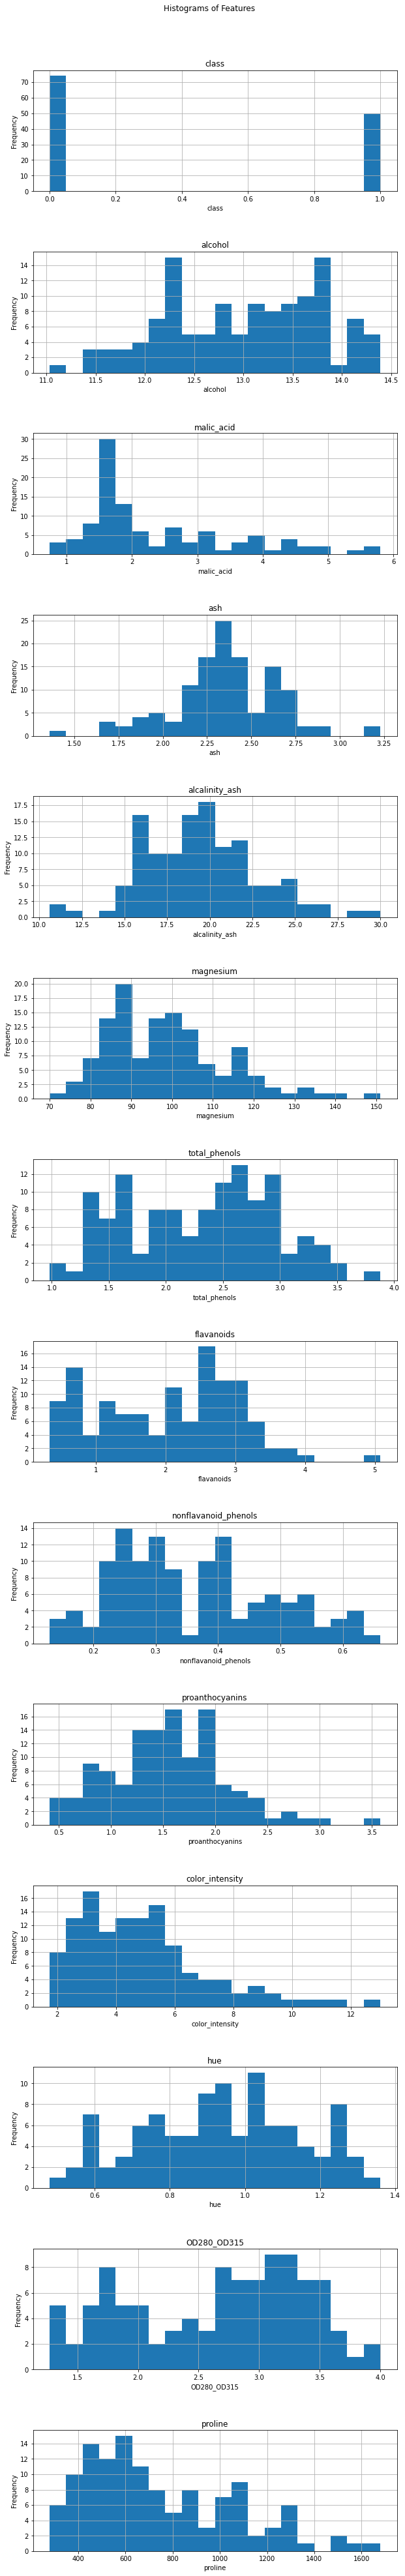

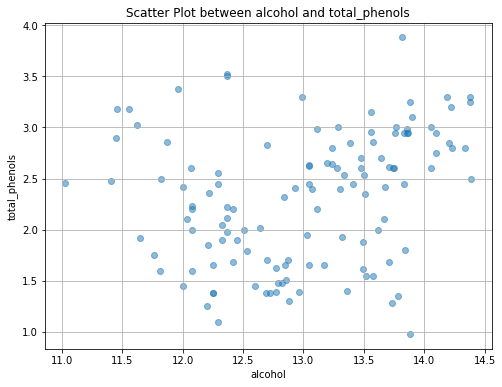

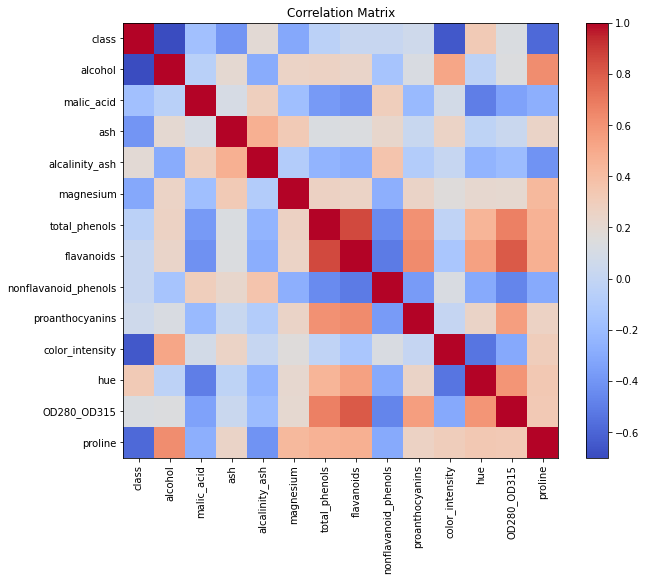

            class     alcohol  malic_acid         ash  alcalinity_ash  \
count  124.000000  124.000000  103.000000  124.000000      124.000000   
mean     0.403226   12.999194    2.389126    2.358871       19.479839   
std      0.492535    0.790802    1.169278    0.291523        3.392387   
min      0.000000   11.030000    0.740000    1.360000       10.600000   
25%      0.000000   12.360000    1.635000    2.227500       17.000000   
50%      0.000000   13.050000    1.860000    2.360000       19.450000   
75%      1.000000   13.672500    3.030000    2.565000       21.500000   
max      1.000000   14.390000    5.800000    3.230000       30.000000   

        magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
count  124.000000     124.000000  124.000000            124.000000   
mean    99.266129       2.309516    2.036855              0.359274   
std     14.574791       0.640991    1.003663              0.128400   
min     70.000000       0.980000    0.340000              0.13

In [23]:
# Your code here
# Create a copy of the training data for exploration
train_data_copy = train_set.copy()

# Basic statistics about each variable
description = train_data_copy.describe()

# Visualize the data: histograms for each feature
num_features = len(train_data_copy.columns)
fig_width = 10  # Width of the figure
fig_height = 5 * num_features  # Adjust the height based on the number of features
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(fig_width, fig_height))
fig.suptitle('Histograms of Features', y=0.9)
for i, column in enumerate(train_data_copy.columns):
    train_data_copy[column].hist(ax=axes[i],bins=20)
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots
plt.show()

# Visualize the data: scatter plots (example with two features)
plt.figure(figsize=(8, 6))
plt.scatter(train_data_copy['alcohol'], train_data_copy['total_phenols'], alpha=0.5)
plt.xlabel('alcohol')
plt.ylabel('total_phenols')
plt.title('Scatter Plot between alcohol and total_phenols')
plt.grid(True)
plt.show()

# Correlation matrix visualization
correlation_matrix = train_data_copy.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

print(description)


## Data preprocessing, dealing with missing values (1 mark)
Often, when dealing with real-world data, we will find that some values are missing or nonsensical. We need to deal with these missing values before doing any further analysis. Furthermore, once we have dealt with the missing values, we may want to perform standardisation or normalisation on the training data.
- In this dataset, missing values have been filled with `NaN` (Not a Number) values. For features with missing values, use the mean value of the non-missing values of that feature to perform imputation. Save these mean values, we will need them later when performing the validation and testing steps.
- Once we have imputed the missing data, standardise the training data by substracting the mean value for each feature and dividing the result by the standard deviation of each feature. Save these values, we will need them later when performing the validation and testing steps.


In [25]:
# Your code here
def preprocess_data(dataset):
    """
    Preprocesses the dataset by imputing missing values with mean and standardizing the data.
    
    Parameters:
    - dataset: DataFrame containing the dataset
    
    Returns:
    - preprocessed_data: Preprocessed DataFrame
    - imputed_means: Dictionary containing mean values used for imputation
    - feature_means: Dictionary containing mean values of each feature for standardization
    - feature_std_devs: Dictionary containing standard deviations of each feature for standardization
    """
    # Calculate mean values of each feature for imputation
    imputed_means = dataset.mean().to_dict()
    
    # Imputation using mean values for missing data
    preprocessed_data = dataset.fillna(imputed_means)
    
    # Calculate mean values of each feature for standardization
    feature_means = preprocessed_data.mean().to_dict()
    
    # Calculate standard deviations of each feature for standardization
    feature_std_devs = preprocessed_data.std().to_dict()
    
    # Standardize the data by subtracting mean and dividing by standard deviation
    for column in dataset.columns:
        preprocessed_data[column] = (preprocessed_data[column] - feature_means[column]) / feature_std_devs[column]
    
    return preprocessed_data, imputed_means, feature_means, feature_std_devs

# Assuming 'train_data' is training dataset DataFrame
# Call the function to preprocess the data
preprocessed_train_data, imputed_means, feature_means, feature_std_devs = preprocess_data(train_set)

# Print mean values used for imputation
print("Imputed Means:")
print(imputed_means)

# Print mean values of each feature for standardization
print("\nFeature Means:")
print(feature_means)

# Print standard deviations of each feature for standardization
print("\nFeature Standard Deviations:")
print(feature_std_devs)

# Display the preprocessed training data
print("\nPreprocessed Training Data:")
print(preprocessed_train_data)



Imputed Means:
{'class': 0.4032258064516129, 'alcohol': 12.99919354838709, 'malic_acid': 2.3891262135922333, 'ash': 2.3588709677419364, 'alcalinity_ash': 19.47983870967741, 'magnesium': 99.26612903225806, 'total_phenols': 2.3095161290322572, 'flavanoids': 2.036854838709678, 'nonflavanoid_phenols': 0.35927419354838735, 'proanthocyanins': 1.554919354838709, 'color_intensity': 4.918306443548387, 'hue': 0.9350576923076925, 'OD280_OD315': 2.653921568627451, 'proline': 742.758064516129}

Feature Means:
{'class': 0.4032258064516129, 'alcohol': 12.99919354838709, 'malic_acid': 2.389126213592233, 'ash': 2.3588709677419364, 'alcalinity_ash': 19.47983870967741, 'magnesium': 99.26612903225806, 'total_phenols': 2.3095161290322572, 'flavanoids': 2.036854838709678, 'nonflavanoid_phenols': 0.35927419354838735, 'proanthocyanins': 1.554919354838709, 'color_intensity': 4.918306443548387, 'hue': 0.9350576923076929, 'OD280_OD315': 2.6539215686274513, 'proline': 742.758064516129}

Feature Standard Deviation

## Building and training a predictive model (4 marks)

We have now curated our training data by removing data observations and features with a large amount of missing values. We have also normalised the feature vectors. We are now in a good position to work on developing the prediction model and validating it. We will now build a logistic regression model with L2 regularisation, and train it using gradient descent.

We first organise the dataframe into the vector of targets $\mathbf{y}$, call it `yTrain`, and the design matrix $\mathbf{X}$, call it `XTrain`. 

In [31]:
# Your code here
# Assuming 'preprocessed_train_data' is the preprocessed DataFrame obtained after data preprocessing

# Separating the target variable ('y') and the features ('X')
yTrain = preprocessed_train_data['class']  # Replace 'target_column' with target column name
XTrain = preprocessed_train_data.drop('class', axis=1)  # Dropping the target column from features

# Adding a column of ones to the design matrix (XTrain) for the bias term
XTrain = np.column_stack((np.ones(len(XTrain)), XTrain))

# Display shapes of yTrain and XTrain
print("Shape of yTrain:", yTrain.shape)
print("Shape of XTrain:", XTrain.shape)

Shape of yTrain: (124,)
Shape of XTrain: (124, 14)


### Finding the optimal $\mathbf{w}$ with stochastic gradient descent

Use gradient descent to iteratively compute the value of $\mathbf{w}_{\text{new}}$. Instead of using all the training set in `XTrain` and `yTrain` to compute the gradient, use a subset of $S$ instances in `XTrain` and `yTrain`. This is sometimes called *minibatch gradient descent,* where $S$ is the size of the minibatch. 

 will need to find the best values for three parameters: $\eta$, the learning rate, $S$, the number of datapoints in the minibatch, and $\gamma$, the regularisation parameter. We can do this using a grid search over the validation set. The grid of values have been provided for in `gamma_vector`, `eta_vector` and `S_vector` 

* In this question we will use the validation data. So before proceeding to the next steps, make sure to replace the missing values in each feature vector with the mean values we computed from the training data, and apply the same normalization procedure that we used for the training data. (**1 mark**)

* `bce_loss`, that calculates the binary cross entropy for a given feature vector, target, array of weights, and regularisation parameter. (**1 mark**)

* `mgd_optimizer`, that takes as input the training data and targets, the learning rate $\eta$, the minibatch size $S$, the regularisation parameter $\gamma$, and the number of iterations $T$. The function should return the optimal $\mathbf{w}$ after the chosen number of iterations. (**1 mark**)

* For each value that of $\gamma$, $\eta$ and $S$ in grid, use the training set to compute $\mathbf{w}$ using `mgd_optimizer` function, and then measure the cross entropy loss using that $\mathbf{w}$ over the validation data. For the validation data, make sure to preprocess it before applying the prediction model over it. For the minibatch gradient descent choose to stop the iterative procedure after $150$ iterations. (**1 mark**)

* Choose the values of $\gamma$, $\eta$ and $S$ that lead to the lowest cross entropy loss, print them out, and save them. we will use them at the test stage. 

Please note, for this section one should not use any libraries other than the ones already imported in the notebook. Do **not** use scikit-learn, scipy, or any other machine learning library. 

In [15]:
# Your code here
def preprocess_validation_data(validation_data, mean_values, feature_means, feature_std_devs):
    # Replace missing values with mean values from training data
    validation_data.fillna(mean_values, inplace=True)
    
    # Normalization using mean and standard deviation values from training data
    for column in validation_data.columns:
        validation_data[column] = (validation_data[column] - feature_means[column]) / feature_std_devs[column]
    
    return validation_data


In [16]:
# Set up functions here

def bce_loss(X, y, w, gamma):
    # Calculate predicted probabilities
    predictions = 1 / (1 + np.exp(-np.dot(X, w)))
    
    # Calculate binary cross-entropy loss
    loss = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions)) + (gamma / 2) * np.sum(w**2)
    
    return loss
def mgd_optimizer(X, y, gamma, eta, S, max_iters):
    # Initialize weights
    w = np.zeros(X.shape[1])
    
    # Minibatch Gradient Descent
    for _ in range(max_iters):
        # Randomly select a minibatch
        indices = np.random.choice(X.shape[0], S, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]
        
        # Compute gradient
        predictions = 1 / (1 + np.exp(-np.dot(X_batch, w)))
        gradient = np.dot(X_batch.T, predictions - y_batch) / S + gamma * w
        
        # Update weights
        w -= eta * gradient
    
    return w

In [17]:
# Grid of values for gamma, eta, and S
num = 10
gamma_vector = np.logspace(-4, -1, num)
eta_vector = np.logspace(-5, -1, num)
S_vector = np.linspace(1, 15, num)

# Preprocess validation set
preprocessed_validation_data = preprocess_validation_data(validation_data, mean_values, feature_means, feature_std_devs)

best_loss = float('inf')  # Initialize best loss with a large value
best_params = {}  # To store best parameters

# Grid search over gamma, eta, and S
for gamma in gamma_vector:
    for eta in eta_vector:
        for S in S_vector:
            # Optimize weights using minibatch gradient descent
            w_optimal = mgd_optimizer(XTrain, yTrain, gamma, eta, int(S), max_iters=150)
            
            # Preprocess validation data using same normalization as training data
            preprocessed_validation = preprocess_validation_data(validation_data, mean_values, feature_means, feature_std_devs)
            
            # Add a column of ones for bias term in the validation data
            preprocessed_validation = np.column_stack((np.ones(len(preprocessed_validation)), preprocessed_validation))
            
            # Calculate BCE loss on validation data using optimized weights
            loss = bce_loss(preprocessed_validation, y_validation, w_optimal, gamma)
            
            # Check if this configuration gives the lowest loss
            if loss < best_loss:
                best_loss = loss
                best_params = {'gamma': gamma, 'eta': eta, 'S': S}
                
# Print the best parameters and lowest loss
print("Best Parameters:", best_params)
print("Lowest Cross-Entropy Loss:", best_loss)


## Testing and results reporting (3 marks)

We now know the best model, according to the validation data. We will now put together the training data and the validation data and perform the preprocessing as before, this is, impute the missing values and scale the inputs. We will train the model again using the minibatch stochastic gradient descent and finally compute the accuracy over the test data.

* (*) In this question we will use the test data. First, combine the original training and validation data and perform the preprocessing again on this new data. Save the values from this preprocessing step. 

* Re-train model on the full training set, using the optimal values of $\gamma$, $\eta$ and $S$. (**1 mark**)

* Preprocess the test data using the values saved in step (*). (**1 mark**)

* Run model on the test data using the optimal values of of $\gamma$, $\eta$ and $S$, and report the following for the test set (**1 mark**):
    * binary cross entropy loss 
    * accuracy 
    * precision
    * recall

In [18]:
# Your code here
# Your code here
# Combine original training and validation data
full_train_data = pd.concat([train_data, val_data], ignore_index=True)

# Preprocess the combined data
full_train_data_preprocessed = preprocess_data(full_train_data, mean_values, std_values)

# Combine original training and validation targets
full_train_targets = np.concatenate([yTrain, validation_targets])

# Train the model on the full training set
w_optimal_full = mgd_optimizer(full_train_data_preprocessed, full_train_targets, best_gamma, best_eta, int(best_S), max_iters=150)

# Assuming 'class' is the column name for labels in the test data
test_targets = test_data['class'].values  

# Preprocess the test data using the saved values
test_data_preprocessed = preprocess_data(test_data, mean_values, std_values)

# Run the model on the test data
test_loss = bce_loss(test_data_preprocessed, test_targets, w_optimal_full, best_gamma)

# Calculate accuracy, precision, and recall
test_predictions = (1 / (1 + np.exp(-np.dot(np.c_[np.ones((len(test_data_preprocessed), 1)), test_data_preprocessed], w_optimal_full)))) > 0.5
accuracy = np.mean(test_predictions == test_targets)
precision = np.sum((test_predictions == 1) & (test_targets == 1)) / np.sum(test_predictions == 1)
recall = np.sum((test_predictions == 1) & (test_targets == 1)) / np.sum(test_targets == 1)

# Report the results
print("Test Set Results:")
print(f"Binary Cross Entropy Loss: {test_loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

In [19]:
# Report test set metrics here